1. Install Dependencies and Setup

In [1]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\jerwin\AppData\Local\Temp\pip-install-_wrml78_\tensorflow-gpu_d5add35f981440a1a364e18514ceca21\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-

In [2]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asgiref                      3.8.1
asttokens                    2.4.1
astunparse                   1.6.3
blinker                      1.7.0
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
Django                       5.0.4
djangorestframework          3.15.1
exceptiongroup               1.2.1
executing                    2.0.1
Flask                        3.0.3
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
ipyk


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#2. Remove dodgy images

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

3.Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'C:/Users/jerwin/Documents/Butterfly'

#singit lang
img_size = 224
#batch = 64

batch_size = 32
img_height = 224
img_width = 224

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

3.Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt
#singit lang
import pandas as pd 
import cv2 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 

In [12]:
#singit lang
train_ds = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

In [13]:
#singit lang
val_ds = ImageDataGenerator(rescale=1. / 255,validation_split=0.2)

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3987 files belonging to 75 classes.
Using 3190 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3987 files belonging to 75 classes.
Using 797 files for validation.


In [16]:
#singit lang
class_names = train_ds.class_names
print(class_names)

['Activity Molting', 'Activity Munching', 'Activity Nectaring', 'Activity Pudding', 'Activity Pupating', 'Butterfly-Batwing', 'Butterfly-Clippers', 'Butterfly-Common Jay', 'Butterfly-Common Lime', 'Butterfly-Common Mime', 'Butterfly-Common Mormon', 'Butterfly-Emerald Swallowtail', 'Butterfly-Giant Silk Moth', 'Butterfly-Golden Birdwing', 'Butterfly-Great Eggfly', 'Butterfly-Great Yellow Mormon', 'Butterfly-Grey Glassy Tiger', 'Butterfly-Paper Kite', 'Butterfly-Pink Rose', 'Butterfly-Plain Tiger', 'Butterfly-Red Lacewing', 'Butterfly-Scarlet Mormon', 'Butterfly-Tailed Jay', 'Defects Broken Wings Atlas', 'Defects Crumpled Wings Butterfly-Common Lime', 'Defects Crumpled Wings Butterfly-Tailed Jay', 'Defects Deformed Pupae-Common Lime', 'Defects Overbend Pupae-Common Lime', 'Defects Overbend Pupae-Common Mormon', 'Defects Pupae-Golden Birdwing', 'Defects Stretchedmark-Common Mormon', 'Disease Larvae Golden Birdwing', 'Disease Larvae Tachinids fly', 'Disease Larvae-Plain Tiger', 'Eggs-Commo

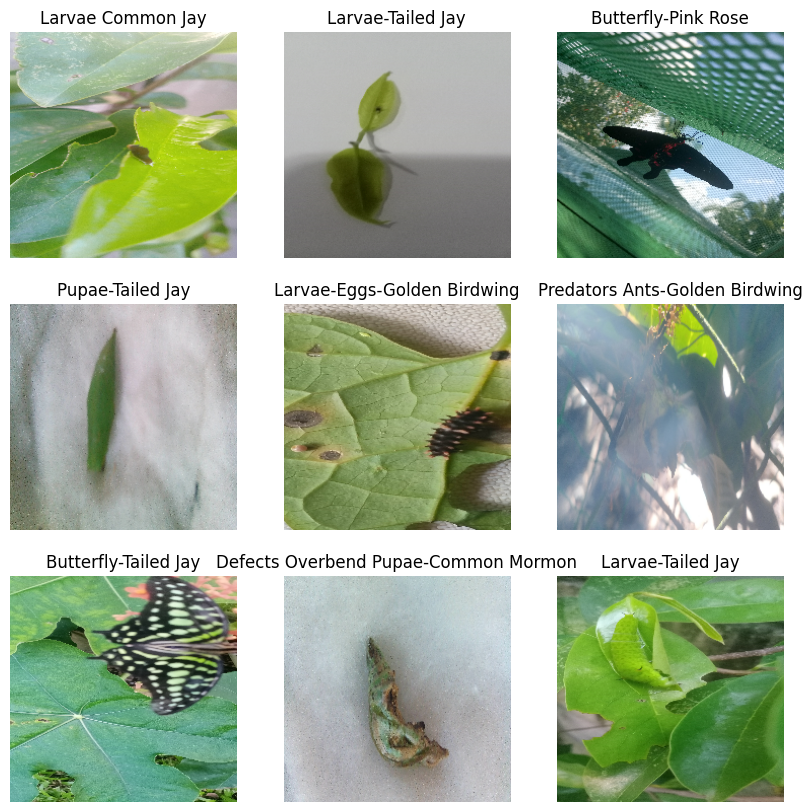

In [17]:
#singit lang
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/jerwin/Documents/Butterfly')

Found 3987 files belonging to 75 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

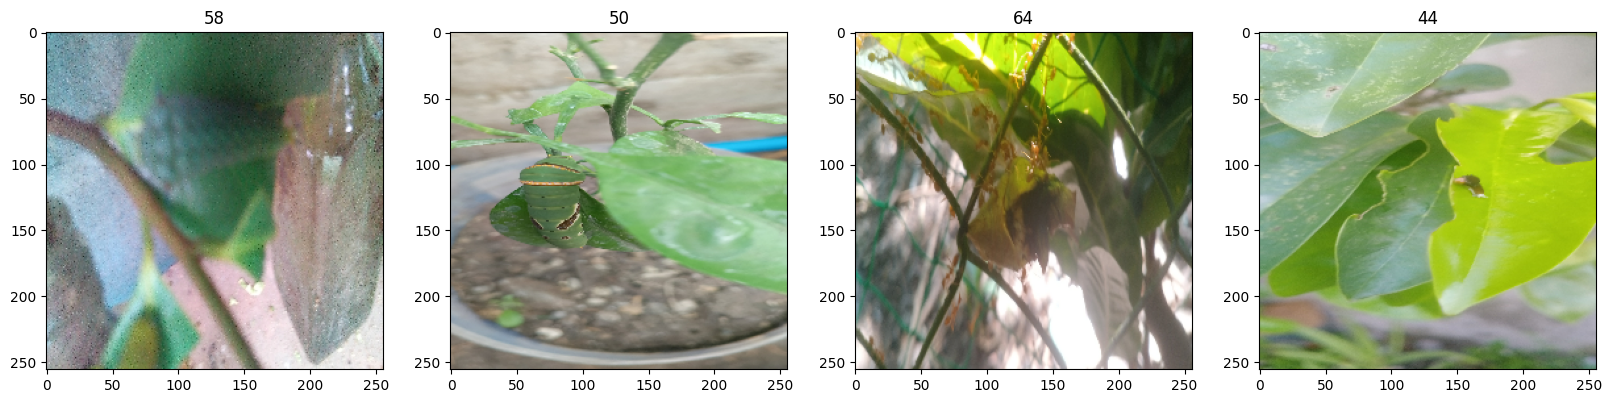

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4.Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.67905945, 0.7221967 , 0.55638784],
          [0.58841914, 0.653148  , 0.489411  ],
          [0.6184781 , 0.6733801 , 0.5417624 ],
          ...,
          [0.5517616 , 0.4674862 , 0.47825137],
          [0.5559475 , 0.44234452, 0.47236902],
          [0.47340685, 0.32438725, 0.38321078]],
 
         [[0.6297258 , 0.6520297 , 0.5519072 ],
          [0.5653531 , 0.5976907 , 0.49746093],
          [0.49977022, 0.5311428 , 0.43763787],
          ...,
          [0.5669041 , 0.4688649 , 0.4923943 ],
          [0.67427236, 0.5544539 , 0.58582646],
          [0.5208142 , 0.3907897 , 0.43576518]],
 
         [[0.545278  , 0.55312115, 0.49821922],
          [0.49447763, 0.5112094 , 0.44140625],
          [0.49926472, 0.50710785, 0.4522059 ],
          ...,
          [0.7430875 , 0.6499234 , 0.6727979 ],
          [0.57642466, 0.4674058 , 0.49590227],
          [0.5161114 , 0.39062116, 0.43375844]],
 
         ...,
 
         [[0.29177773, 0.38981694, 0.13491498],
          [0.31458

5.Split Data

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

87

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6.Build Deep Learning Model

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\jerwin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 86s 898ms/step - accuracy: 0.0000e+00 - loss: -23839076.0000 - val_accuracy: 0.0000e+00 - val_loss: -1363188096.0000
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 75s 854ms/step - accuracy: 0.0000e+00 - loss: -12031952896.0000 - val_accuracy: 0.0000e+00 - val_loss: -148625047552.0000
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.0000e+00 - loss: -387834806272.0000 - val_accuracy: 0.0000e+00 - val_loss: -2008840273920.0000
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3242s 38s/step - accuracy: 0.0000e+00 - loss: -3580888350720.0000 - val_accuracy: 0.0000e+00 - val_loss: -11646521049088.0000
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 39443s 459s/step - accuracy: 0.0000e+00 - loss: -17087179259904.0000 - val_accuracy: 0.0000e+00 - val_loss: -41491875495936.0000
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3810s 44s/step - accuracy: 0.0000e+00 - loss: -56247625711616.0000 - val_accuracy: 0.0000e+00 - val_loss: -114386563760128.0000
Epoch 7/10
87/87 ━━━━━━━━━━━

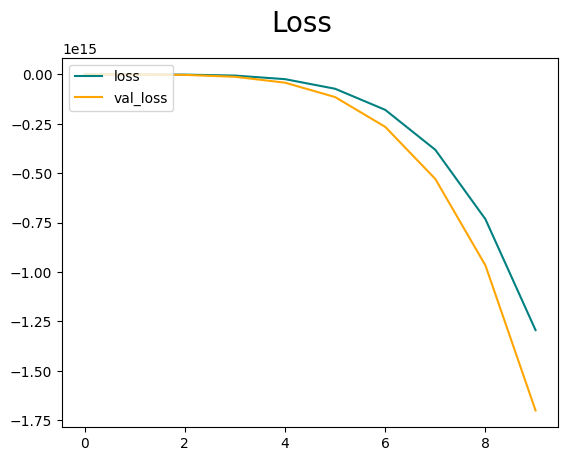

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

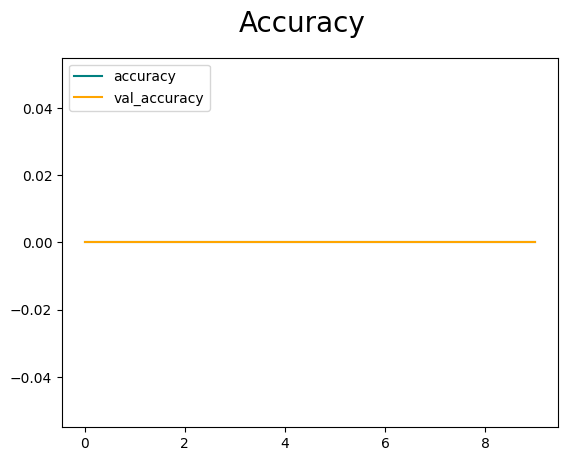

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


Test

In [42]:
import cv2

In [43]:
# img = cv2.imread('C:/Users/jerwin/Documents/Butterfly/Defects Pupae-Golden Birdwing /IMG_20231230_114636_915.JPG')
# plt.imshow(img)
# plt.show()

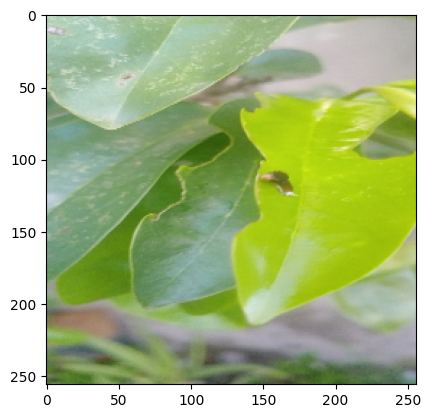

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


In [46]:
yhat

array([[1.]], dtype=float32)

In [47]:
if yhat > 0.5:
    print(f'Predicted class is Defects')
else:
    print(f'Predicted class is Healthy')

Predicted class is Defects


11.Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models','C:/Users/jerwin/Documents/model/butterfly_classifier.h5'))
#model.save(os.path.join('models','C:/Users/jerwin/Documents/model/butterfly_classifier.json'))

In [50]:
new_model = load_model('C:/Users/jerwin/Documents/model/pupadefectsclassifier.h5')

In [51]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[1.]], dtype=float32)